# Smart Study Coach — Data Exploration, Cleaning & Recommendation

Inhoud:
1. **Business Understanding & Data Collection** - Formuleert een duidelijke probleemstelling, verantwoordt maatschappelijke relevantie, houdt rekening met ethiek en privacy (EU AI Act 2025/AVG).
2. **Exploratory Data Analysis (EDA) & Dataprocessing** - Voert een systematische verkenning van de dataset uit en maakt deze geschikt voor modellering.
3. **Opschonen dataset** - opschonen `Uitgebreide_VKM_dataset.csv`
4. **Analyse op Schonen dataset** - analyse van de schonen data, counts (unique tags, locations), en error rate per kolom.
5. **NLP & Recommendation Engine** - text cleaning, TF-IDF vectorization, cosine similarity and a `recommend()` helper.
6. **Model Optimization & Performance Tuning** - todo
7. **Demo** - todo



# Business Understanding & Data Collection

**Probleemstelling**

Binnen het huidige studieprogramma ervaren studenten vaak moeilijkheden bij het kiezen van een passende vrije keuzemodule (VKM). Het aanbod is groot, de beschikbare informatie is verspreid, en de begeleiding bij het maken van keuzes is beperkt. Hierdoor nemen studenten soms beslissingen die niet optimaal aansluiten bij hun interesses, waarden of loopbaandoelen.

Het doel van dit project is daarom om een Smart Study Coach te ontwikkelen: een AI-toepassing die studenten ondersteunt bij het maken van correcte keuze van een vrij keuze module. Deze toepassing zal het studentprofiel analyseren en gepersonaliseerde aanbevelingen doen op basis van de overeenkomsten met de beschikbare modules.

**Maatschappelijke relevantie**

Het keuzeproces van studenten heeft een directe invloed op motivatie, studiesucces en welzijn. Door studenten beter te begeleiden, kan deze toepassing bijdragen aan:
1. Hogere studiebetrokkenheid en motivatie.
2. Minder studievertraging of verkeerde keuze.
3. Een beter aansluitend studiepad richting persoonlijke en professionele doelen.

De Smart Study Coach draagt bij aan de bredere maatschappelijke trend van verantwoorde AI in het onderwijs, waarin technologie wordt ingezet om gelijke kansen en persoonlijke ontwikkeling te bevorderen.

**Ethiek en privacy (EU AI Act 2025 / AVG)**

Bij het ontwikkelen van een AI-systeem voor studieadvies moet goed worden opgelet dat alles volgens de ethische en wettelijke regels gebeurt. De volgende principes, die direct of indirect voortkomen uit de EU AI Act 2025 en de AVG, sluiten goed aan op ons AI-systeem:
1. Transparantie & uitlegbaarheid: De aanbevelingen van de Smart Study Coach moeten begrijpelijk en uitlegbaar zijn, zodat studenten weten waarom een module wordt voorgesteld.
2. Privacy by Design: Persoonlijke gegevens van studenten (zoals interesses of waarden) worden uitsluitend gebruikt voor het aanbevelingsdoel en veilig opgeslagen volgens de AVG-richtlijnen.
3. Data-minimisatie: Er wordt enkel data verzameld die strikt noodzakelijk is voor het functioneren van het model.
4. Menselijke controle: De uiteindelijke keuze blijft altijd bij de student; de AI dient als ondersteunend instrument, niet als beslisser.

## Deel 1 — Data Exploratie (EDA) & Dataprocessing
We beginnen met het lade van de dataset en dan korte analyse:
- aantal unieke tags (`module_tags`)
- aantal modules per `location`
- kolom counts of empty / weird / ntb values (pre-cleaning)


In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Load dataset
raw_path = "Uitgebreide_VKM_dataset.csv"
df_raw = pd.read_csv(raw_path)
print(f"Loaded dataset with {len(df_raw)} rows and {len(df_raw.columns)} columns")

# Setup Stopwords for Tags (Dutch + English)
stop_words = set(stopwords.words('english')) | set(stopwords.words('dutch'))
# Add specific noise words if necessary
extra_noise = {"ntb", "nan", "null", "none", "'", "['", "']"} 
stop_words.update(extra_noise)

Loaded dataset with 211 rows and 20 columns


Column analysis (pre-cleaning):


,column,empty_values,empty_%,weird_values,weird_%,ntb,ntb_%,general_error_total,general_error_%
12,Blauw,209,99.05,0,0.00,0,0.00,209,99.05
13,Geel,209,99.05,0,0.00,0,0.00,209,99.05
11,Groen,209,99.05,0,0.00,0,0.00,209,99.05
10,Rood,209,99.05,0,0.00,0,0.00,209,99.05
9,learningoutcomes,5,2.37,33,15.64,26,12.32,64,30.33
2,shortdescription,20,9.48,0,0.00,10,4.74,30,14.22
14,module_tags,0,0.00,10,4.74,0,0.00,10,4.74
3,description,0,0.00,6,2.84,2,0.95,8,3.79
4,content,0,0.00,6,2.84,2,0.95,8,3.79
1,name,0,0.00,0,0.00,0,0.00,0,0.00


Generating Pre-Cleaning Visualizations...


C:\Users\Storm\AppData\Local\Temp\ipykernel_19292\3789853778.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_counts.values, y=loc_counts.index, ax=axes[0], palette="viridis")
C:\Users\Storm\AppData\Local\Temp\ipykernel_19292\3789853778.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=tags_df, ax=axes[1], palette="magma")


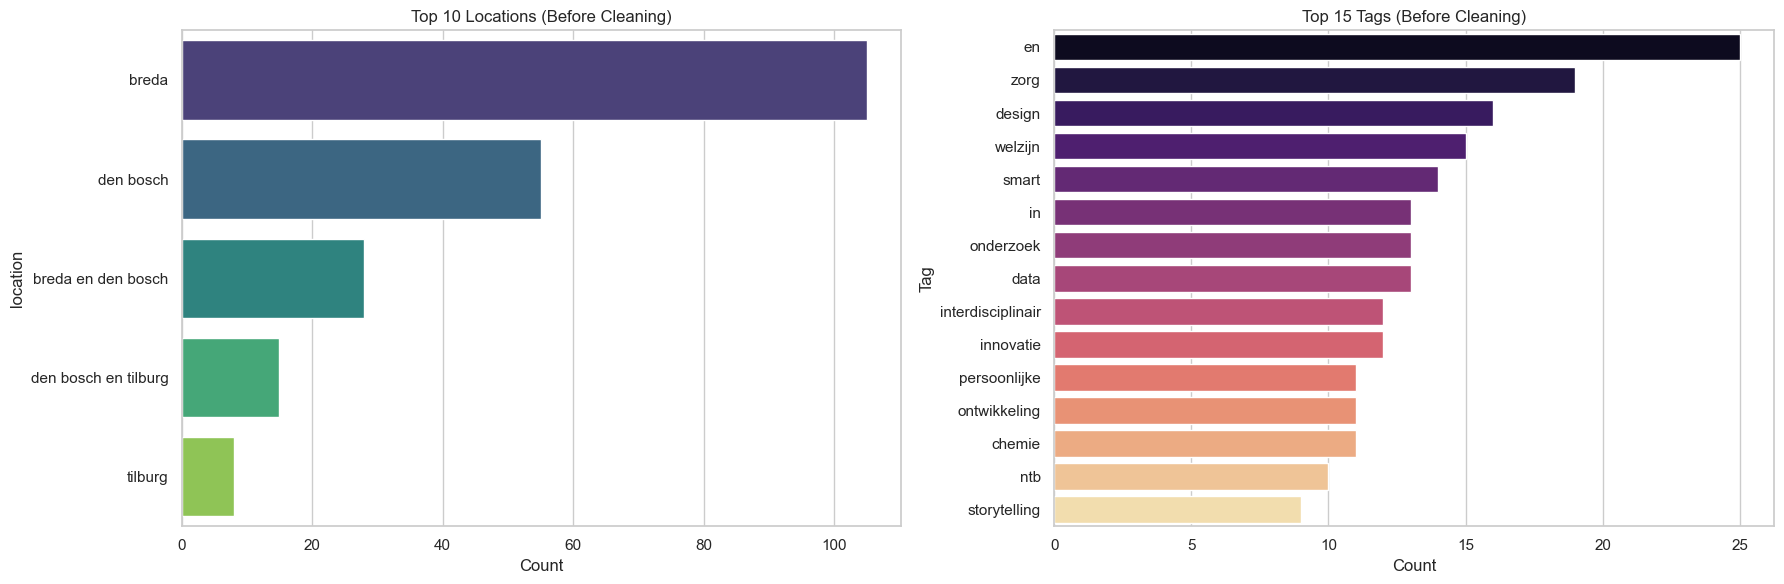

In [11]:
empty_values = ["", "nan", "none", "null", "[]"]
weird_values = [
    "nvt", "volgt", "nader te bepalen", "nog niet bekend",
    "nadert te bepalen", "nog te formuleren", "tbd", "n.n.b.", "navragen", "['ntb']"
]

def is_empty(value):
    if value is None or (isinstance(value, float) and np.isnan(value)):
        return True
    if isinstance(value, str) and value.strip() == "":
        return True
    return False

def is_weird(value):
    if not isinstance(value, str):
        return False
    val = value.lower().strip()
    return any(w in val for w in weird_values)

def is_ntb(value):
    return isinstance(value, str) and value.strip().lower() == "ntb"

def analyze_dataframe_simple(df_in):
    analysis = []
    for col in df_in.columns:
        total = len(df_in[col])
        empty_count = df_in[col].apply(is_empty).sum()
        weird_count = df_in[col].apply(is_weird).sum()
        ntb_count = df_in[col].apply(is_ntb).sum()
        general_error_count = empty_count + weird_count + ntb_count
        general_error_percent = round((general_error_count / total) * 100, 2)
        analysis.append({
            "column": col,
            "empty_values": int(empty_count),
            "empty_%": round((empty_count / total) * 100, 2),
            "weird_values": int(weird_count),
            "weird_%": round((weird_count / total) * 100, 2),
            "ntb": int(ntb_count),
            "ntb_%": round((ntb_count / total) * 100, 2),
            "general_error_total": int(general_error_count),
            "general_error_%": general_error_percent
        })
    analysis_df = pd.DataFrame(analysis).sort_values(by="general_error_%", ascending=False)
    return analysis_df

print("Column analysis (pre-cleaning):")
col_analysis_pre = analyze_dataframe_simple(df_raw)
display(col_analysis_pre)

def visualize_data(df_in, title_stage):
    """
    Generates bar charts for Locations and Top Tags.
    """
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # --- 1. Location Analysis ---
    if 'location' in df_in.columns:
        loc_counts = df_in['location'].fillna('ntb').astype(str).str.lower().value_counts().head(10)
        sns.barplot(x=loc_counts.values, y=loc_counts.index, ax=axes[0], palette="viridis")
        axes[0].set_title(f"Top 10 Locations ({title_stage})")
        axes[0].set_xlabel("Count")
    
    # --- 2. Tag Analysis ---
    if 'module_tags' in df_in.columns:
        tags_series = df_in['module_tags'].fillna('')
        all_tags = []
        
        for t in tags_series.astype(str):
            # Clean string representation of list to actual words
            # Remove brackets, quotes, and split by comma
            cleaned = re.sub(r"[\[\]']", "", t) 
            parts = cleaned.split(',')
            for p in parts:
                p = p.strip().lower()
                # Basic filtering for the plot (ignoring raw empty strings)
                if p and len(p) > 1:
                    all_tags.append(p)
                    
        # Count and plot
        tag_counts = Counter(all_tags).most_common(15)
        if tag_counts:
            tags_df = pd.DataFrame(tag_counts, columns=['Tag', 'Count'])
            sns.barplot(x='Count', y='Tag', data=tags_df, ax=axes[1], palette="magma")
            axes[1].set_title(f"Top 15 Tags ({title_stage})")
        else:
            axes[1].text(0.5, 0.5, "No Tags Found", ha='center')
            
    plt.tight_layout()
    plt.show()

# Run Visualization on Raw Data
print("Generating Pre-Cleaning Visualizations...")
visualize_data(df_raw, title_stage="Before Cleaning")



## Conclusie
De initiële analyse van de ruwe dataset (211 rijen) onthult enkele kritieke datakwaliteitsproblemen die de modellering direct beïnvloeden:

* **Irrelevante Kolommen:** De kolommen `Rood`, `Groen`, `Blauw` en `Geel` bevatten bijna uitsluitend (99.05%) lege waarden. Dit maakt ze irrelevant voor het aanbevelingsmodel, en ze worden daarom verwijderd.
* **Aanpak 'Learning Outcomes':** De kolom `learningoutcomes` bevat de hoogste concentratie aan fouten (30.33%), voornamelijk 'weird' en 'ntb' waarden. Dit vereist normalisatie, maar het hoge percentage aan missende data betekent dat dit veld voor een aanzienlijk deel van de modules onbruikbaar zal blijven.
* **Korte Beschrijving Imputatie:** De kolom `shortdescription` heeft een significant aantal missende waarden (14.22%), wat de kwaliteit van de gecombineerde tekst voor TF-IDF zou verminderen. De 'smart fill'-strategie is essentieel om deze gaten op te vullen met data uit `description` en `content`.
* **Tags en Beschrijvingen:** De kerndata voor de aanbevelingsengine, zoals `module_tags`, `description` en `content`, bevatten relatief weinig fouten (<5%), maar de aanwezige 'weird' waarden in de tags-kolom moeten gestandaardiseerd worden.

De vervolgstappen zullen zich richten op het verwijderen van irrelevante data en het intelligent imputeren en normaliseren van de tekstkolommen om een rijke en schone `combined_text` kolom te garanderen.

---
## Deel 2 — Opschoning & Voorbereiding
We voeren de opschoningsstappen uit met uitleg. De strategie is:
1. Verwijder irrelevante kolommen (de kleuren) indien aanwezig.
2. Normaliseer waarden naar string, kleine letters en trim.
3. Vervang letterlijke lege indicatoren door `ntb` (Nader Te Bepalen).
4. Pas een veilige regex-vervanging toe voor bekende 'weird' zinnen (alleen als de celinhoud precies overeenkomt met een van deze zinnen).
5. Vul `shortdescription` slim op met de eerste zinnen uit `description` en `content` waar beschikbaar.


Removing stopwords from module_tags...
Filling shortdescription using description/content where needed...

Analysis after cleaning:


,column,empty_values,empty_%,weird_values,weird_%,ntb,ntb_%,general_error_total,general_error_%
9,learningoutcomes,0,0.0,2,0.95,62,29.38,64,30.33
10,module_tags,0,0.0,0,0.00,30,14.22,30,14.22
3,description,0,0.0,4,1.90,4,1.90,8,3.79
4,content,0,0.0,4,1.90,4,1.90,8,3.79
2,shortdescription,0,0.0,2,0.95,2,0.95,4,1.90
5,studycredit,0,0.0,0,0.00,0,0.00,0,0.00
0,id,0,0.0,0,0.00,0,0.00,0,0.00
1,name,0,0.0,0,0.00,0,0.00,0,0.00
7,contact_id,0,0.0,0,0.00,0,0.00,0,0.00
6,location,0,0.0,0,0.00,0,0.00,0,0.00


Generating Post-Cleaning Visualizations...


C:\Users\Storm\AppData\Local\Temp\ipykernel_19292\3789853778.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_counts.values, y=loc_counts.index, ax=axes[0], palette="viridis")
C:\Users\Storm\AppData\Local\Temp\ipykernel_19292\3789853778.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=tags_df, ax=axes[1], palette="magma")


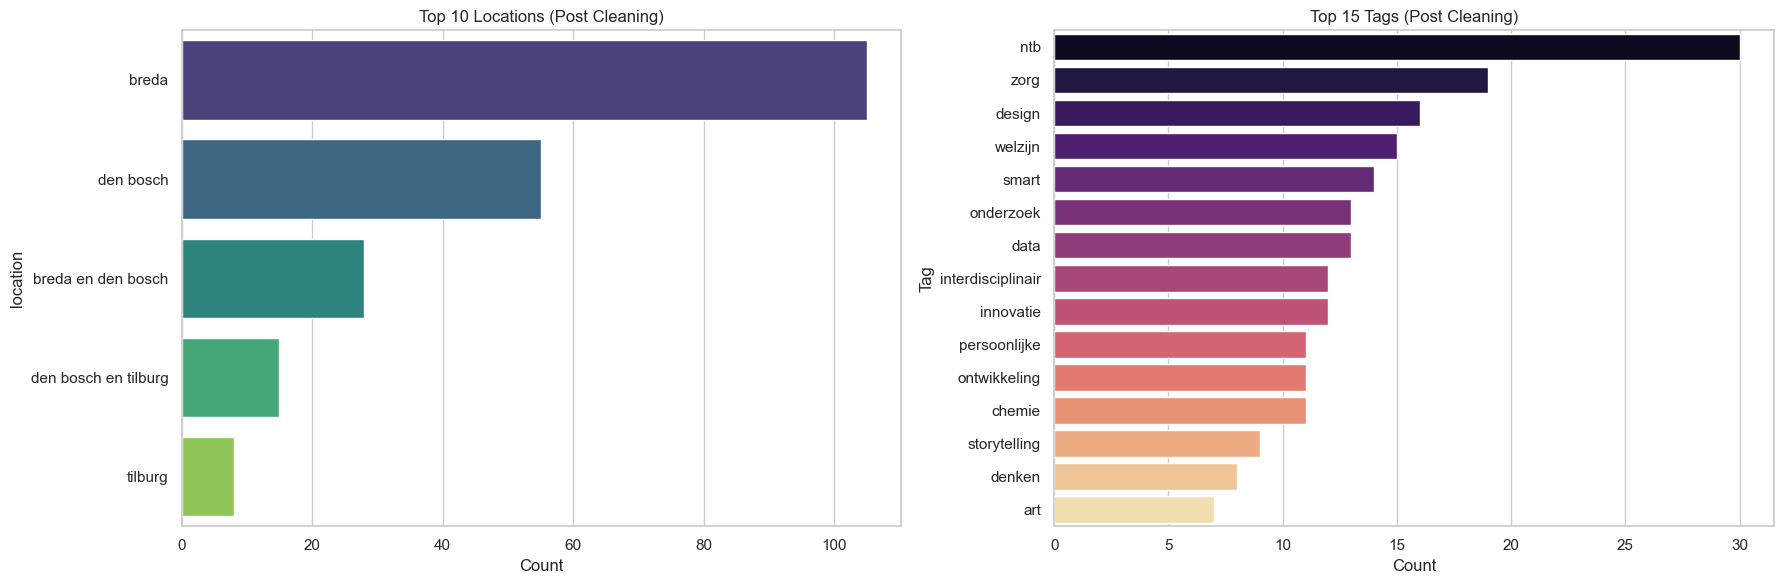

Cleaned file written to: Uitgebreide_VKM_dataset_zonder_weird_data.csv


In [12]:
df = df_raw.copy()
cols_to_drop = ["Rood", "Groen", "Blauw", "Geel"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Convert to string (safe for TF-IDF later) and normalize
df = df.fillna('')
for col in df.columns:
    # Cast to string for consistent processing
    df[col] = df[col].astype(str)
    df[col] = df[col].str.lower().str.strip()

# Replace explicit empty-like strings with 'ntb'
for val in empty_values:
    df.replace(val, 'ntb', inplace=True)

# Safe regex for weird_values: only replace if the entire cell equals the weird phrase
safe_pattern = r'^\s*(' + '|'.join([re.escape(v) for v in weird_values]) + r')\s*$'
for col in df.columns:
    df[col] = df[col].replace(to_replace=safe_pattern, value='ntb', regex=True)

# Specific Tag Cleaning (Stopword Removal)
def clean_tags_column(tag_string):
    if tag_string == 'ntb': return 'ntb'
    
    # 1. Remove list characters like [ ] ' "
    clean_str = re.sub(r"[\[\]'\"]", "", tag_string)
    
    # 2. Split by comma
    tags = clean_str.split(',')
    
    valid_tags = []
    for tag in tags:
        tag = tag.strip().lower()
        # 3. Filter: Must not be a stopword, must be > 1 char, must not be numeric
        if tag and tag not in stop_words and len(tag) > 1 and not tag.isdigit():
            valid_tags.append(tag)
            
    # Return as a clean comma-separated string (easier for reading) 
    # or keep as list string if preferred. Here we join them.
    return ", ".join(valid_tags) if valid_tags else "ntb"

print("Removing stopwords from module_tags...")
df['module_tags'] = df['module_tags'].apply(clean_tags_column)

# Smart fill for shortdescription
def fill_short_smart(row):
    short = row.get('shortdescription', 'ntb')
    if short and short != 'ntb':
        return short
    desc = row.get('description', 'ntb')
    content = row.get('content', 'ntb')
    valid_desc = desc and desc != 'ntb'
    valid_content = content and content != 'ntb'
    if valid_desc and valid_content:
        if desc == content:
            return desc
        return f"{desc} {content}"
    if valid_desc:
        return desc
    if valid_content:
        return content
    return 'ntb'

if 'shortdescription' in df.columns:
    print("Filling shortdescription using description/content where needed...")
    df['shortdescription'] = df.apply(fill_short_smart, axis=1)
else:
    print("No shortdescription column found; skipping smart fill.")

print('\nAnalysis after cleaning:')
col_analysis_post = analyze_dataframe_simple(df)
display(col_analysis_post)

print("Generating Post-Cleaning Visualizations...")
visualize_data(df, title_stage="Post Cleaning")


# Save cleaned file
out_path = 'Uitgebreide_VKM_dataset_zonder_weird_data.csv'
df.to_csv(out_path, index=False)
print(f"Cleaned file written to: {out_path}")


### Conclusie van de Opgeschoonde Data-analyse (Post-Opschoning)

Na het doorlopen van de opschoningspijplijn is de datakwaliteit aanzienlijk verbeterd, wat de betrouwbaarheid van het aanbevelingsmodel ten goede komt:

* **Kritieke Verbetering:** De kolom `shortdescription` is sterk verbeterd, met het foutpercentage gereduceerd van 14.22% naar slechts 1.90%. Dit bewijst de effectiviteit van de 'smart fill'-strategie, waardoor waardevolle tekstuele input is behouden.
* **Normalisatie van Fouten:** Alle 'empty' en 'weird' waarden in de tekstkolommen zijn nu gestandaardiseerd naar 'ntb', wat de data consistent maakt voor de NLP-stap. Het foutpercentage in `learningoutcomes` is onveranderd (30.33%), maar de data is wel genormaliseerd.
* **Impact van Stopwoordverwijdering:** De stijging van het foutpercentage in `module_tags` van 4.74% naar 14.22% is een acceptabel neveneffect van het verwijderen van stopwoorden. Dit betekent dat ongeveer 10% van de modules alleen tags bevatte die uit stopwoorden bestonden, wat aangeeft dat deze tags weinig informatieve waarde hadden voor de aanbevelingsengine.
* **Klaar voor NLP:** De resterende kernkolommen (`name`, `description`, `content`, `module_tags`) zijn nu zo schoon en gestandaardiseerd mogelijk, waardoor de dataset optimaal is voor de volgende stap: TF-IDF vectorisatie.

---
## Deel 3 — NLP & Aanbevelingsengine
We schonen de tekst op voor NLP, vectoriseren met behulp van TF-IDF en berekenen cosinusgelijkenis. Uitleg volgt na de cellen.

## Functie voor Gebruikersgebaseerde Aanbevelingen

We introduceren een nieuwe aanbevelingsstrategie die de focus verlegt van **module-tegen-module** gelijkenis naar **gebruikersprofiel-tegen-module** gelijkenis. Dit stelt de gebruiker in staat om gepersonaliseerde aanbevelingen te ontvangen op basis van directe input, zoals favoriete tags en interacties met modules (geliked of overgeslagen). 


In [13]:
from langdetect import detect as lang_detect
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# -----------------------------
# 1. Setup
# -----------------------------
nltk.download("stopwords")

# Stopwords: English + Dutch
stop_words = set(stopwords.words("dutch")) | set(stopwords.words("english"))

# Stemmers for both languages
stemmer_en = SnowballStemmer("english")
stemmer_nl = SnowballStemmer("dutch")

def detect_language_safe(text):
    """Safe language detector with fallback."""
    try:
        return lang_detect(text)
    except:
        return "unknown"


# -----------------------------
# 2. Dual-language NLP cleaning
# -----------------------------

def clean_text_nlp(text):
    if not isinstance(text, str) or text.strip() == "" or text.lower() in weird_values:
        return "ntb"

    # Lowercase
    text = text.lower()

    # Keep only letters + accents
    text = re.sub(r"[^a-zA-Záéíóúàèçäëïöüñ\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # Detect language
    lang = detect_language_safe(text)

    # Tokenize + remove stopwords
    words = [w for w in text.split() if w not in stop_words]

    # Apply correct stemmer
    if lang == "nl":
        words = [stemmer_nl.stem(w) for w in words]
    elif lang == "en":
        words = [stemmer_en.stem(w) for w in words]
    else:
        # Unknown language – fallback: apply both (neutral approach)
        words = [stemmer_nl.stem(stemmer_en.stem(w)) for w in words]

    return " ".join(words) if words else "ntb"


print("Applying EN + NL NLP cleaning...")

if "shortdescription" in df.columns:
    df["shortdescription"] = df["shortdescription"].apply(clean_text_nlp)

if "description" in df.columns:
    df["description"] = df["description"].apply(clean_text_nlp)

# Lowercase for all object columns
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.lower()


# -----------------------------
# 3. Combine fields for TF-IDF
# -----------------------------
df["combined_text"] = (
    df.get("name", pd.Series([""] * len(df))).astype(str) + " " +
    df.get("shortdescription", pd.Series([""] * len(df))).astype(str) + " " +
    df.get("module_tags", pd.Series([""] * len(df))).astype(str) + " " +
    df.get("location", pd.Series([""] * len(df))).astype(str)
)


# -----------------------------
# 4. Multi-language TF-IDF + similarity
# -----------------------------
vectorizer = TfidfVectorizer(
    stop_words=list(stop_words),   # EN + NL stopwords
    min_df=1
)

matrix = vectorizer.fit_transform(df["combined_text"])
print(f"TF-IDF matrix shape: {matrix.shape}")

similarities = cosine_similarity(matrix)

similarity_df = pd.DataFrame(
    similarities,
    index=df.get("name", pd.Series(range(len(df)))),
    columns=df.get("name", pd.Series(range(len(df))))
)


Applying EN + NL NLP cleaning...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Storm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF matrix shape: (211, 1772)


### Uitleg van de Aanpak

1.  **Constructie van Gebruikersprofiel (User Profile Vector):**
    * Er wordt een synthetische 'gebruikersmodule' gecreëerd die de voorkeuren van de student vertegenwoordigt.
    * **Positieve Input (Tags & Likes):** De teksten (`combined_text`) van de **gelikede modules** worden verzameld en hieraan worden de **favoriete tags** toegevoegd. Dit maximaliseert de positieve signalen over wat de gebruiker leuk vindt.
    * **Negatieve Input (Skipped Modules):** De overgeslagen modules (`skipped_modules`) worden gebruikt voor **exclusie/filtering**. Ze worden niet in de profieltekst opgenomen, maar de aanbevelingsfunctie zorgt ervoor dat deze modules niet in de uiteindelijke resultaten verschijnen.

2.  **Vectorisatie:** De gecombineerde tekst van het gebruikersprofiel wordt door **dezelfde `TfidfVectorizer`** gehaald die is gebruikt om de modulematrix te maken. Dit zorgt ervoor dat de gebruikersvector in exact dezelfde dimensies en functieruimte bestaat als de modulevectoren.

3.  **Gelijkenisberekening:** De cosinusgelijkenis wordt berekend tussen de **gebruikersvector** en **alle** modulevectoren in de matrix. Modules met de hoogste score zijn het meest vergelijkbaar met het profiel van de gebruiker.

De nieuwe functie `recommend_to_user()` implementeert deze logica.

In [14]:
def recommend(module_name, similarity_df, top_n=5):
    if module_name not in similarity_df.index:
        print('Module not found. Showing top items from dataset index:')
        print(list(similarity_df.index)[:10])
        return []
    recs = similarity_df.loc[module_name].sort_values(ascending=False)[1:top_n+1]
    results = [(name, float(score)) for name, score in recs.items()]
    print(f"Recommendations for '{module_name}':")
    for name, score in results:
        print(f"- {name} (score={score:.3f})")
    return results

def create_user_profile_vector(
    favorite_tags, liked_modules, skipped_modules, df, vectorizer, combined_text_col='combined_text'
):
    """
    Creates a single vector for the user based on their input, using the existing TF-IDF Vectorizer.
    
    Args:
        favorite_tags (list): List of user's favorite tags (e.g., ['python', 'ai', 'cloud']).
        liked_modules (list): List of names of modules the user liked.
        skipped_modules (list): List of names of modules the user skipped (currently used for exclusion/filtering).
        df (pd.DataFrame): The main DataFrame containing module data.
        vectorizer (TfidfVectorizer): The fitted TF-IDF vectorizer.
        combined_text_col (str): The column in df that contains the pre-processed combined text.

    Returns:
        scipy.sparse.csr.csr_matrix: The TF-IDF vector for the user profile.
    """
    
    # 1. Combine positive text sources
    positive_profile_text = []
    
    # A. Add Favorite Tags (clean them first)
    cleaned_tags = [tag.lower().strip() for tag in favorite_tags if tag.strip()]
    positive_profile_text.extend(cleaned_tags)
    
    # B. Add combined_text of Liked Modules
    liked_module_names = set(liked_modules)
    
    # Find the rows for liked modules and exclude skipped ones from being liked (just in case)
    valid_liked_indices = df[df['name'].isin(liked_module_names)].index
    
    # We should filter out skipped modules just in case they're also in 'liked_modules'
    skipped_module_names = set(skipped_modules)
    
    for idx in valid_liked_indices:
        module_name = df.loc[idx, 'name']
        if module_name not in skipped_module_names:
            # Append the already combined and cleaned text
            positive_profile_text.append(df.loc[idx, combined_text_col])
    
    # The user profile is a single string of all collected content
    user_text = ' '.join(positive_profile_text)
    
    # 2. Vectorize the user's profile text using the *fitted* vectorizer
    # We pass it as a list with a single element
    user_vector = vectorizer.transform([user_text])
    
    return user_vector

def recommend_to_user(
    favorite_tags, liked_modules, skipped_modules, df, vectorizer, matrix, top_n=5
):
    """
    Generates module recommendations based on a user's explicit preferences.
    
    Args:
        favorite_tags (list): User's favorite tags.
        liked_modules (list): Names of modules the user liked.
        skipped_modules (list): Names of modules the user skipped.
        df (pd.DataFrame): The main DataFrame.
        vectorizer (TfidfVectorizer): The fitted TF-IDF vectorizer.
        matrix (sparse matrix): The TF-IDF matrix for all modules.
        top_n (int): Number of recommendations to return.
        
    Returns:
        list: A list of tuples (module_name, score).
    """
    # 1. Create the user vector
    user_vector = create_user_profile_vector(
        favorite_tags, liked_modules, skipped_modules, df, vectorizer
    )
    
    # 2. Compute similarity between the user vector and all module vectors
    # This returns a 1xN array of scores
    user_similarities = cosine_similarity(user_vector, matrix).flatten()
    
    # 3. Get the indices of the top N modules
    # np.argsort returns indices that would sort an array
    # [::-1] reverses the order for descending (most similar first)
    # [0:top_n] takes the top N indices
    top_indices = user_similarities.argsort()[::-1][0:top_n]
    
    results = []
    recommended_names = set()
    
    # Get the names of the modules to exclude (liked, skipped)
    exclude_names = set(liked_modules) | set(skipped_modules)
    
    # print("\nUser Profile:")
    # print(f"- Tags: {favorite_tags}")
    # print(f"- Liked: {liked_modules}")
    # print(f"- Skipped: {skipped_modules}")
    # print("-" * 30)
    # print(f"Top {top_n} Recommendations for User:")
    
    # We iterate through the top indices and skip any that the user has already interacted with
    # We may need to check more than top_n indices to find top_n *new* modules.
    max_search_idx = min(len(user_similarities), len(user_similarities) + 10) 
    
    for i in user_similarities.argsort()[::-1]:
        module_name = df.loc[i, 'name']
        score = user_similarities[i]
        
        # Exclude modules the user has already liked or skipped
        if module_name not in exclude_names and module_name not in recommended_names:
            recommended_names.add(module_name)
            results.append((module_name, score))
            
        if len(results) >= top_n:
            break
    
    return results



### Resultaat

- User input wordt verwerkt door verschillende data als input te vragen zoals de favoriete modules, de overgeslagen modules en de gelikte tags.
- De aanbevelingsservice geeft een top 5 van nieuwe modules terug met de overeenkomstige gelijkenisscore op basis van het samengestelde gebruikersprofiel.

### Demo


In [15]:
# 1. Basic demonstration of recommend() function
example_name = df['name'].iloc[0] if 'name' in df.columns else None
if example_name is not None:
    recommend(example_name, similarity_df, top_n=5)
else:
    print('No name column found to demonstrate recommendations')
    

# 2. Get some example names from the dataset for demonstration
example_module_1 = df['name'].iloc[1] if len(df) > 1 else "Module A"
example_module_2 = df['name'].iloc[2] if len(df) > 2 else "Module B"
example_module_3 = df['name'].iloc[3] if len(df) > 3 else "Module C"
example_module_4 = df['name'].iloc[4] if len(df) > 4 else "Module D"

# 3. Define a hypothetical user's input (this is what comes from the site)
user_favorite_tags = ['data science', 'ai', 'amsterdam']
user_liked_modules = [example_module_1, example_module_2]
user_skipped_modules = [example_module_3]

# 4. Run the new user-based recommendation function
if 'name' in df.columns:
    recommend_to_user(
        favorite_tags=user_favorite_tags,
        liked_modules=user_liked_modules,
        skipped_modules=user_skipped_modules,
        df=df,
        vectorizer=vectorizer,
        matrix=matrix,
        top_n=5
    )

Recommendations for 'kennismaking met psychologie':
- minor forensisch onderzoek in de rechtbank- (if/ka) (score=0.066)
- de stem van je geweten. ga opzoek naar jouw moreel kompas. (score=0.042)
- tutorial club (score=0.029)
- animatie / storytelling (score=0.026)
- duurzaamheid/ csrd/ circulariteit, (score=0.022)



6. Model Evaluation Using Fake Test Users
We evaluate recommendation quality using the 6 predefined test personas.
Each persona has:
 - input tags / liked / skipped modules
 - hidden `ground_truth_keywords` that the model should ideally detect

 Metrics:
 - **Precision:** % of recommended modules containing relevant keywords
 - **Recall:** % of ground truth keywords the model captured in recommendations
 - **F1-score:** harmonic mean of precision and recall

 A result table is printed at the end.



In [16]:
# Define 3 types of users, 2 users per type

# Get some example names from the dataset for demonstration
example_module_1 = df['name'].iloc[10] if len(df) > 1 else "Module A"
example_module_2 = df['name'].iloc[32] if len(df) > 2 else "Module B"
example_module_3 = df['name'].iloc[43] if len(df) > 3 else "Module C"
example_module_4 = df['name'].iloc[12] if len(df) > 4 else "Module D"

# Define a hypothetical user's input (this is what comes from the site)


def extract_module_keywords(module_row, top_n=10, stop_words=None):
    """
    Extracts keywords from module features and filters stopwords/custom words.
    """
    stop_words = stop_words or set()
    
    text_fields = [
        module_row.get('module_tags', ''),
        module_row.get('shortdescription', ''),
        module_row.get('description', ''),
        module_row.get('content', ''),
        module_row.get('learningoutcomes', '')
    ]
    combined_text = ' '.join([str(f) for f in text_fields]).lower()
    
    # Simple tokenization
    tokens = re.findall(r'\b[a-zA-ZÀ-ÿ]+\b', combined_text)
    
    # Filter stopwords and short words
    filtered_tokens = [t for t in tokens if not (t in stop_words or t == 'ntb' ) and len(t) > 2]
    
    freq = Counter(filtered_tokens)
    
    keywords = [k for k, v in freq.most_common(top_n)]
    return keywords


def auto_generate_ground_truth(user, df, top_n_per_module=5):
    """Automatically generates ground truth keywords from liked modules."""
    ground_truth = []
    liked = user['input'].get('liked_modules', [])
    
    for module_name in liked:
        row = df[df['name'] == module_name]
        if len(row) > 0:
            keywords = extract_module_keywords(row.iloc[0], top_n=top_n_per_module, stop_words=stop_words)
            ground_truth.extend(keywords)
    
    # Deduplicate
    ground_truth = list(set(ground_truth))
    
    # If the user has no liked modules, fallback to favorite_tags
    if not ground_truth:
        ground_truth = [tag.lower() for tag in user['input'].get('favorite_tags', [])]
    
    return ground_truth


test_users = [
    # --- TYPE 1: NEW USERS (Tags Only) ---
    {
        "id": "New_User_1",
        "type": "Type 1 (New)",
        "input": {
            "favorite_tags": ["psychologie", "gedrag", "mens"],
            "liked_modules": [],
            "skipped_modules": []
        },
        # Hidden interest used for testing recall
        "ground_truth_keywords": ["psychologie", "brein", "cognitieve", "mental"]
    },
    {
        "id": "New_User_2",
        "type": "Type 1 (New)",
        "input": {
            "favorite_tags": ["economie", "finance"],
            "liked_modules": [],
            "skipped_modules": []
        },
        "ground_truth_keywords": ["accounting", "financieel", "geld", "economie"]
    },

    # --- TYPE 2: SKIPPERS (Tags + Skips) ---
    {
        "id": "Skipper_1",
        "type": "Type 2 (Skipper)",
        "input": {
            "favorite_tags": ["psychologie", "gedrag", "mens"],
            "liked_modules": [],
            "skipped_modules": [example_module_1, example_module_2]
        },
        "ground_truth_keywords": ["ontwerpen", "design", "kunst", "media"]
    },
    {
        "id": "Skipper_2",
        "type": "Type 2 (Skipper)",
        "input": {
            "favorite_tags": ["economie", "finance"],
            "liked_modules": [],
            "skipped_modules": [example_module_3, example_module_4]
        },
        "ground_truth_keywords": ["leiderschap", "project", "organisatie"]
    },

    # --- TYPE 3: POWER USERS (Mixed) ---
    {
        "id": "Power_User_1",
        "type": "Type 3 (Power)",
        "input": {
            "favorite_tags": ["psychologie", "gedrag", "mens"],
            "liked_modules": [example_module_3, example_module_4],
            "skipped_modules": [example_module_1, example_module_2]
        },
        "ground_truth_keywords": ["data", "python", "java", "programming", "ai"]
    },
    {
        "id": "Power_User_2",
        "type": "Type 3 (Power)",
        "input": {
            "favorite_tags": ["economie", "finance"],
            "liked_modules": [example_module_1, example_module_2], 
            "skipped_modules": [example_module_3, example_module_4]
        },
        "ground_truth_keywords": ["filosofie", "maatschappij", "ethiek", "moreel"]
    }
]

for user in test_users:
    user['ground_truth_keywords'] = auto_generate_ground_truth(user, df, top_n_per_module=5)



In [17]:
def extract_keywords_from_text(text):
    """Extract normalized keyword tokens from module text."""
    text = text.lower()
    tokens = re.findall(r"[a-zA-ZÀ-ÿ]+", text)  
    return tokens

def evaluate_recommendations(test_users, df, vectorizer, matrix, top_n=5):
    """Runs all test personas through the recommendation engine and computes Precision/Recall."""
    
    results = []

    for user in test_users:
        print("="*60)
        print(f"Testing: {user['id']} — {user['type']}")
        print("="*60)

        recs = recommend_to_user(
            user["input"]["favorite_tags"],
            user["input"]["liked_modules"],
            user["input"]["skipped_modules"],
            df,
            vectorizer,
            matrix,
            top_n=top_n
        )

        # --- Extract recommended texts ---
        recommended_texts = []
        for (name, score) in recs:
            row = df.loc[df["name"] == name]
            if len(row) > 0:
                recommended_texts.append(row.iloc[0]["combined_text"].lower())

        # Combine into one big bag-of-words for matching
        big_rec_text = " ".join(recommended_texts)
        tokens = extract_keywords_from_text(big_rec_text)

        # Deduplicate
        token_set = set(tokens)

        # --- Precision Metrics ---
        hits = 0
        for k in user["ground_truth_keywords"]:
            if k.lower() in big_rec_text:
                hits += 1
        
        precision = hits / len(recs) if len(recs) > 0 else 0

        # --- Recall Metrics ---
        recall = hits / len(user["ground_truth_keywords"]) if len(user["ground_truth_keywords"]) else 0

        # --- F1-score ---
        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0

        # Store results
        results.append({
            "User ID": user["id"],
            "Type": user["type"],
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Keyword Hits": hits,
            "Total GT Keywords": len(user["ground_truth_keywords"])
        })

        print(f"\n Precision: {precision:.3f}")
        print(f" Recall: {recall:.3f}")
        print(f" F1-score: {f1:.3f}")
        print("\n")

    return pd.DataFrame(results)



# Run evaluation
evaluation_df = evaluate_recommendations(test_users, df, vectorizer, matrix, top_n=5)

display(evaluation_df)


Testing: New_User_1 — Type 1 (New)

 Precision: 0.400
 Recall: 0.667
 F1-score: 0.500


Testing: New_User_2 — Type 1 (New)

 Precision: 0.400
 Recall: 1.000
 F1-score: 0.571


Testing: Skipper_1 — Type 2 (Skipper)

 Precision: 0.400
 Recall: 0.667
 F1-score: 0.500


Testing: Skipper_2 — Type 2 (Skipper)

 Precision: 0.400
 Recall: 1.000
 F1-score: 0.571


Testing: Power_User_1 — Type 3 (Power)

 Precision: 0.600
 Recall: 0.429
 F1-score: 0.500


Testing: Power_User_2 — Type 3 (Power)

 Precision: 0.600
 Recall: 0.300
 F1-score: 0.400




,User ID,Type,Precision,Recall,F1-Score,Keyword Hits,Total GT Keywords
0,New_User_1,Type 1 (New),0.4,0.666667,0.500000,2,3
1,New_User_2,Type 1 (New),0.4,1.000000,0.571429,2,2
2,Skipper_1,Type 2 (Skipper),0.4,0.666667,0.500000,2,3
3,Skipper_2,Type 2 (Skipper),0.4,1.000000,0.571429,2,2
4,Power_User_1,Type 3 (Power),0.6,0.428571,0.500000,3,7
5,Power_User_2,Type 3 (Power),0.6,0.300000,0.400000,3,10


# Visualize Recommendations vs Liked Modules
Scatterplot of all modules in 2D space (via PCA or t-SNE).
Highlights:
- Liked modules (green)
- Recommended modules (red)
- Other modules (gray)

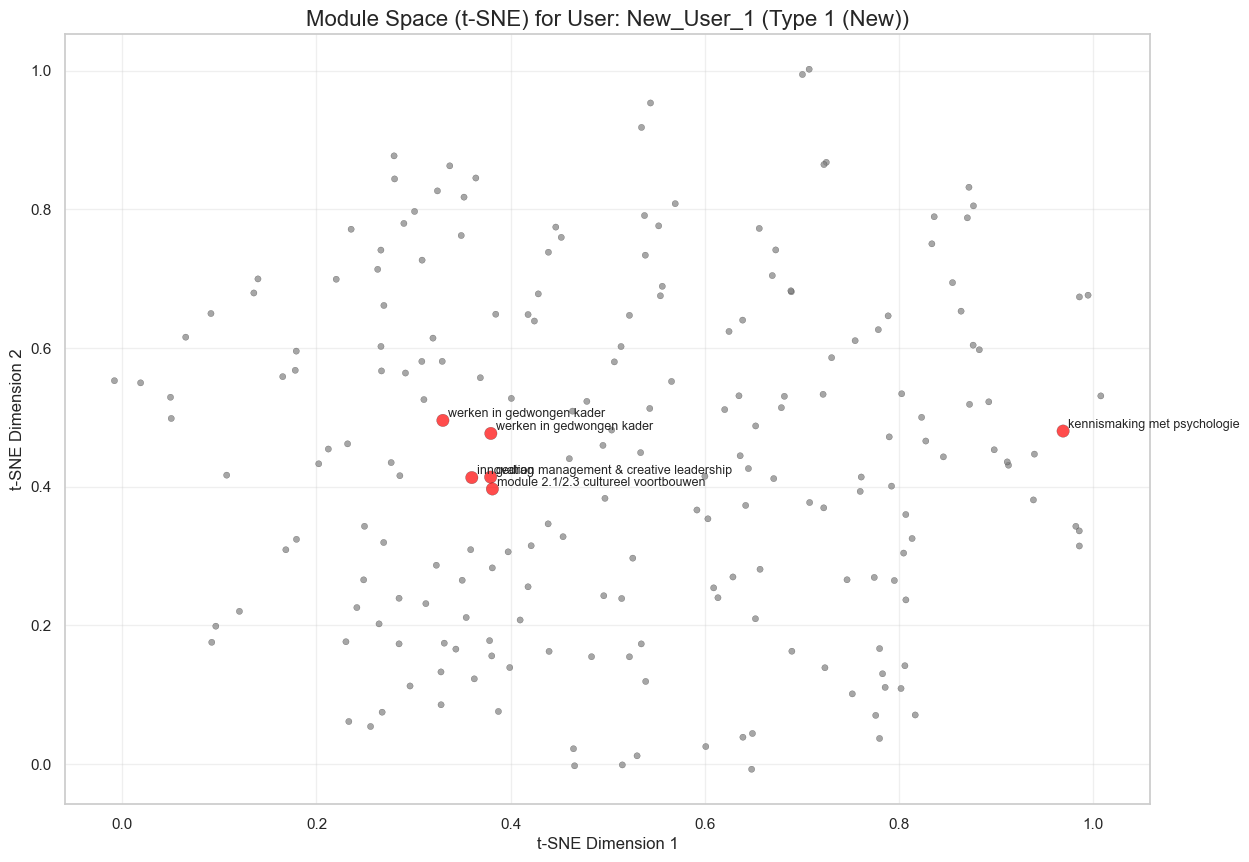

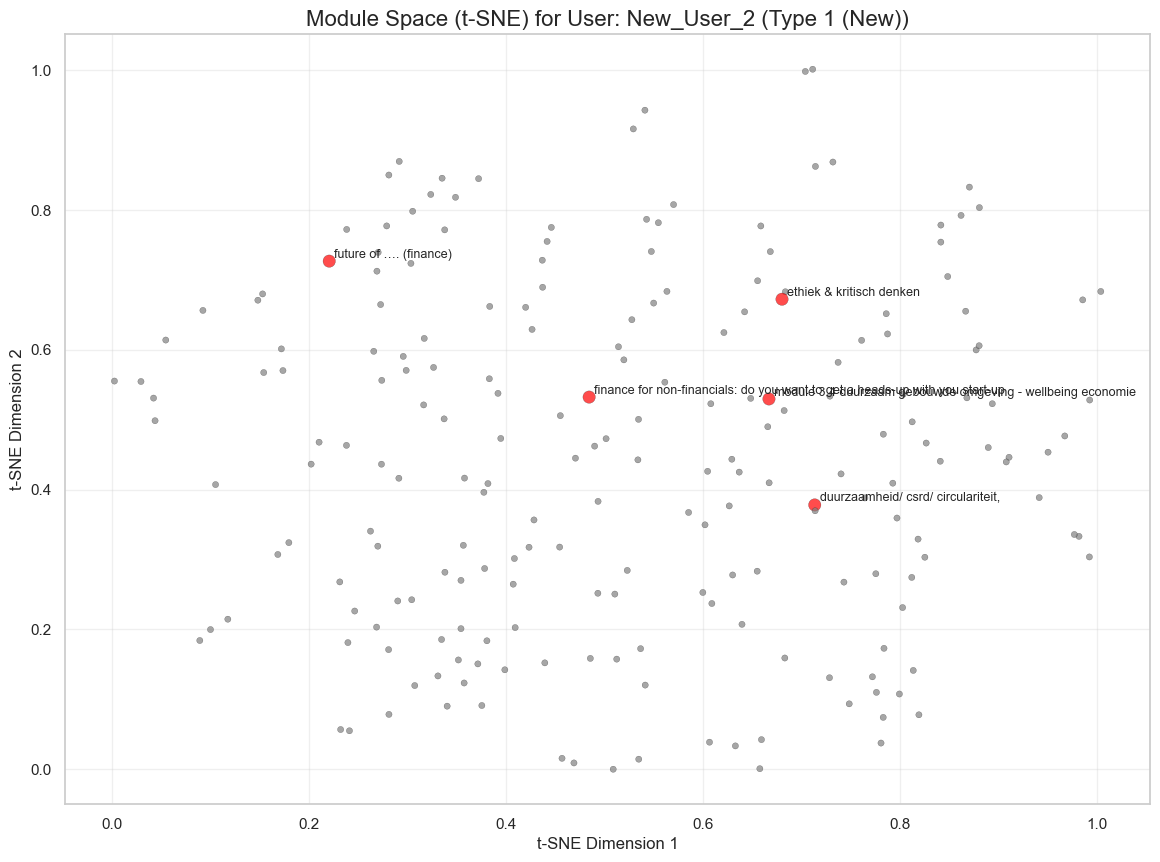

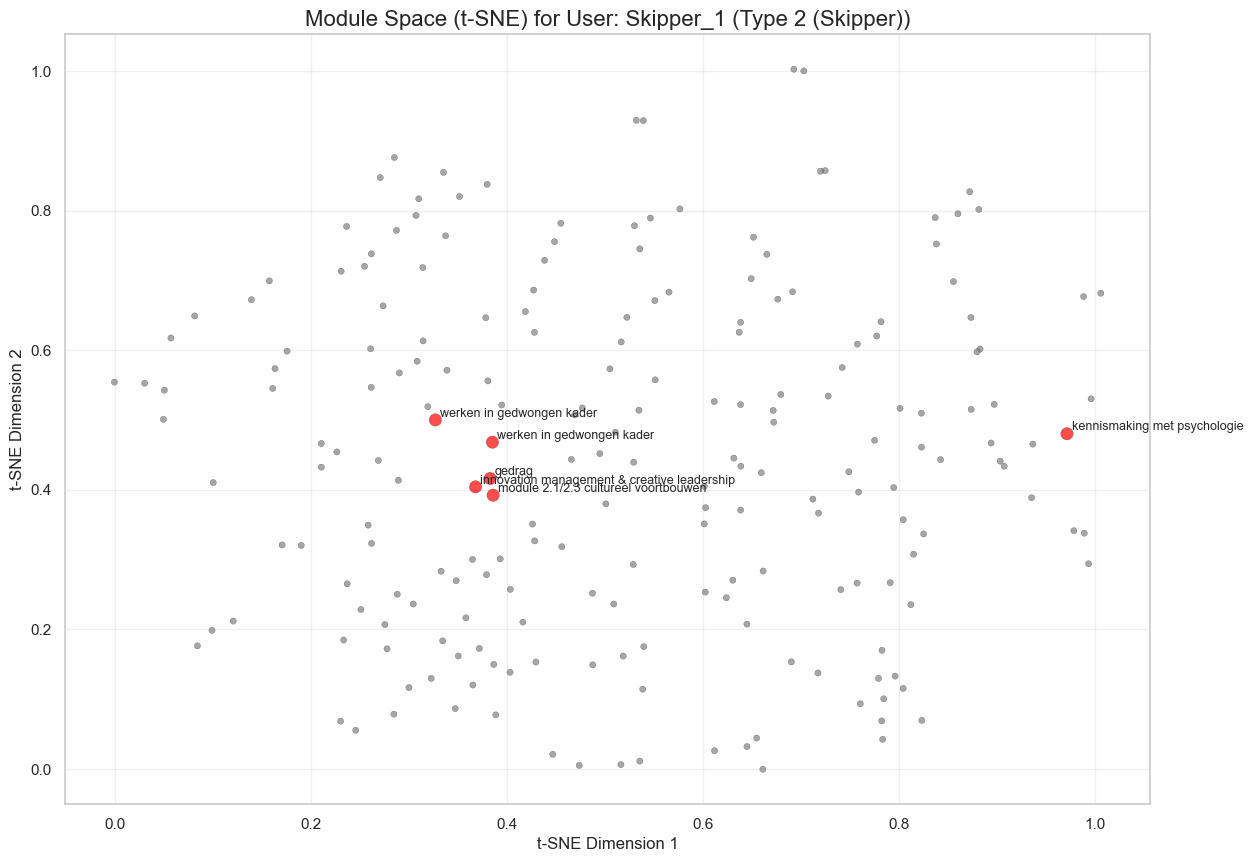

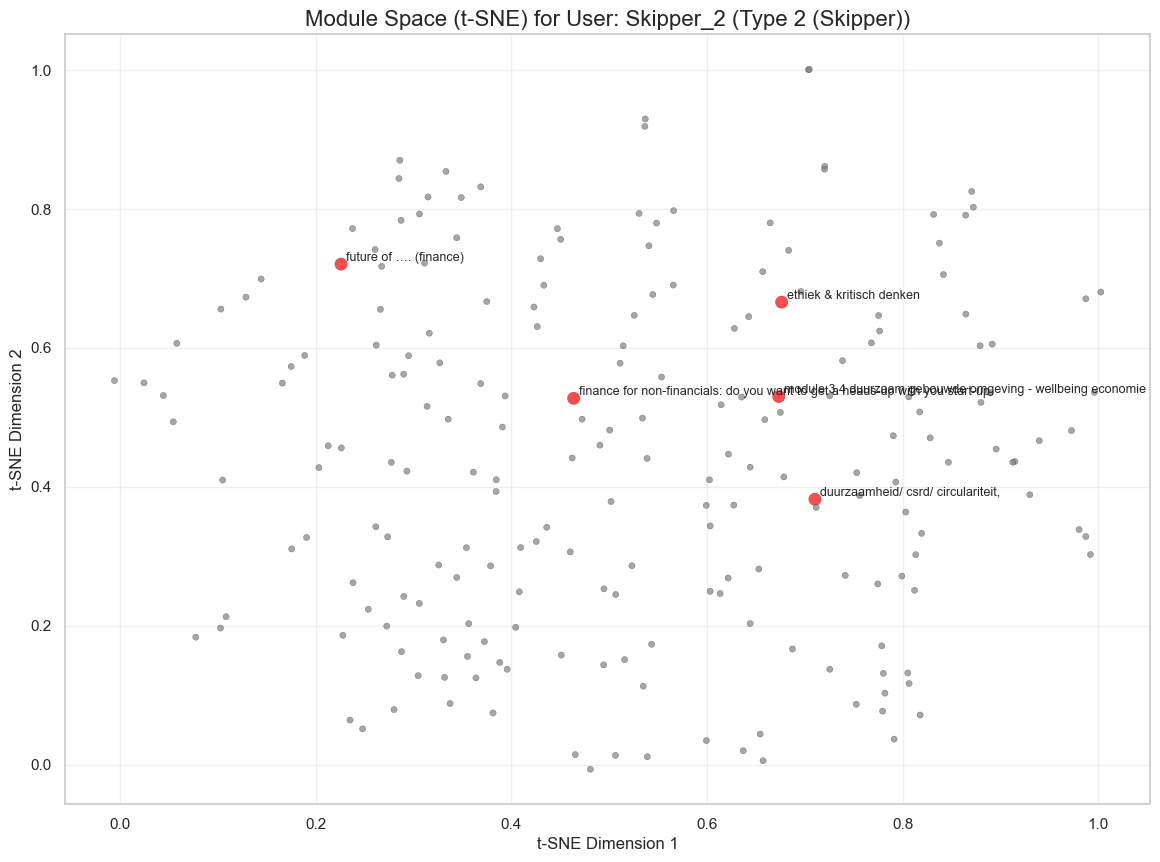

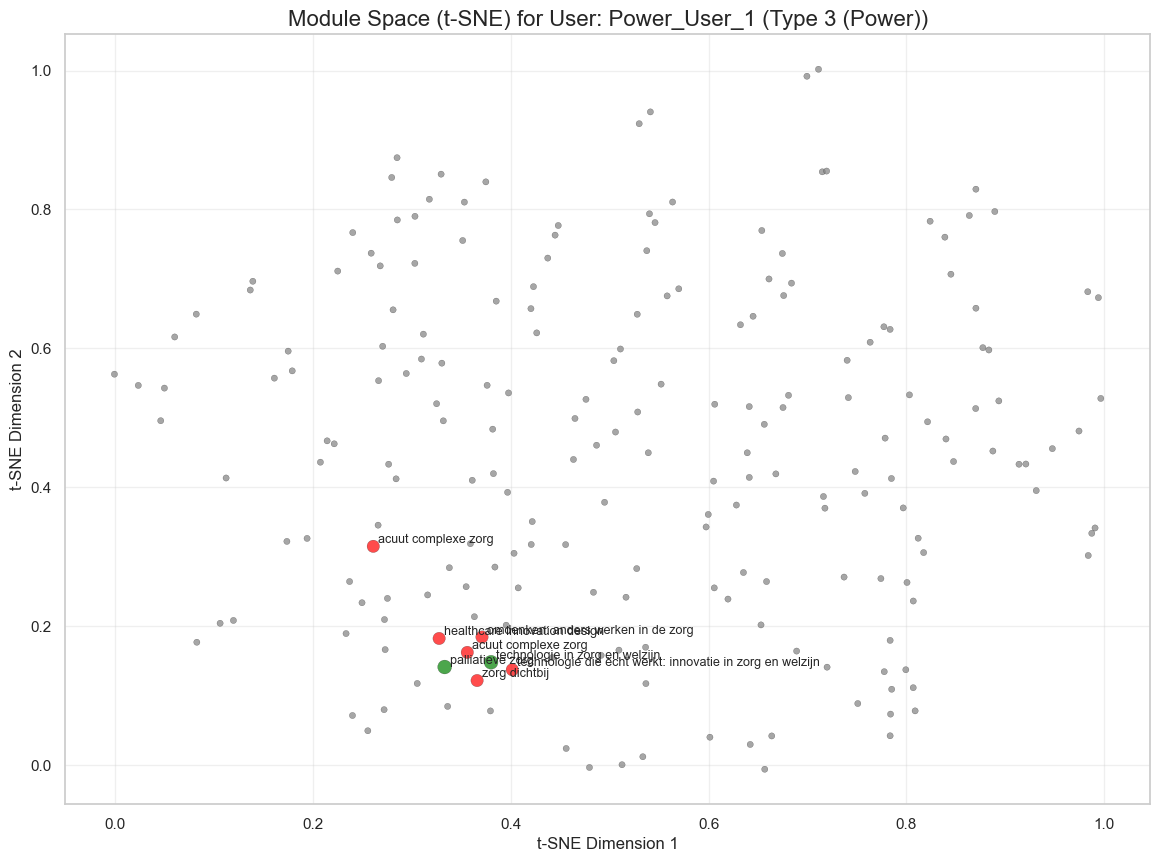

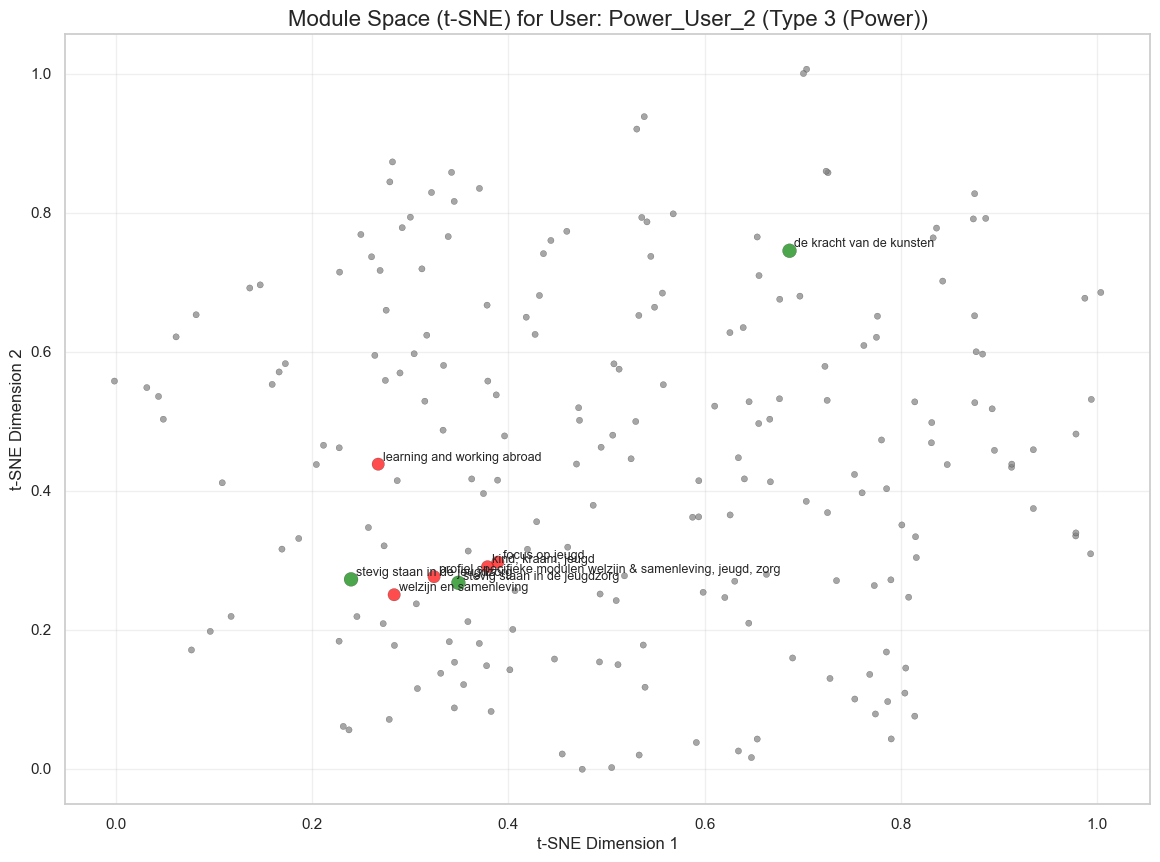

In [18]:

from sklearn.manifold import TSNE

def visualize_user_recommendations_tsne(
    user, df, vectorizer, matrix, top_n=5, perplexity=15, learning_rate=200, jitter=0.005
):
    """
    Visualize all modules in 2D using t-SNE, highlighting liked and recommended modules.
    
    Args:
        user: a test_user dictionary
        df: module dataframe
        vectorizer: fitted TF-IDF vectorizer
        matrix: TF-IDF matrix (sparse)
        top_n: number of recommendations
        perplexity: t-SNE perplexity parameter
        learning_rate: t-SNE learning rate
        jitter: small random noise to reduce overlap
    """
    # 1. Compute recommendations
    recs = recommend_to_user(
        user["input"]["favorite_tags"],
        user["input"]["liked_modules"],
        user["input"]["skipped_modules"],
        df,
        vectorizer,
        matrix,
        top_n=top_n
    )
    recommended_names = [name for name, score in recs]

    # 2. t-SNE embedding
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, learning_rate=learning_rate)
    reduced = tsne.fit_transform(matrix.toarray())

    # 3. Normalize to 0-1 range
    x = (reduced[:,0] - reduced[:,0].min()) / (reduced[:,0].max() - reduced[:,0].min())
    y = (reduced[:,1] - reduced[:,1].min()) / (reduced[:,1].max() - reduced[:,1].min())

    # 4. Add small jitter to reduce overlap
    x += np.random.normal(0, jitter, size=x.shape)
    y += np.random.normal(0, jitter, size=y.shape)

    # 5. Plotting
    plt.figure(figsize=(14,10))
    colors = []
    sizes = []

    for i, module_name in enumerate(df['name']):
        if module_name in user["input"]["liked_modules"]:
            colors.append('green')
            sizes.append(100)
        elif module_name in recommended_names:
            colors.append('red')
            sizes.append(80)
        else:
            colors.append('gray')
            sizes.append(20)

    plt.scatter(x, y, c=colors, s=sizes, alpha=0.7, edgecolor='k', linewidth=0.2)

    # Annotate liked and recommended modules
    for i, module_name in enumerate(df['name']):
        if module_name in user["input"]["liked_modules"] or module_name in recommended_names:
            plt.text(x[i]+0.005, y[i]+0.005, module_name, fontsize=9)

    plt.title(f"Module Space (t-SNE) for User: {user['id']} ({user['type']})", fontsize=16)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(alpha=0.3)
    plt.show()


# Example: visualize first test user
for user in test_users:
    visualize_user_recommendations_tsne(user, df, vectorizer, matrix, top_n=5)
